## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the dataset

In [2]:
df_train = pd.read_csv('data/Train_cleaned.csv')

## Graphical Insides

### Correlations

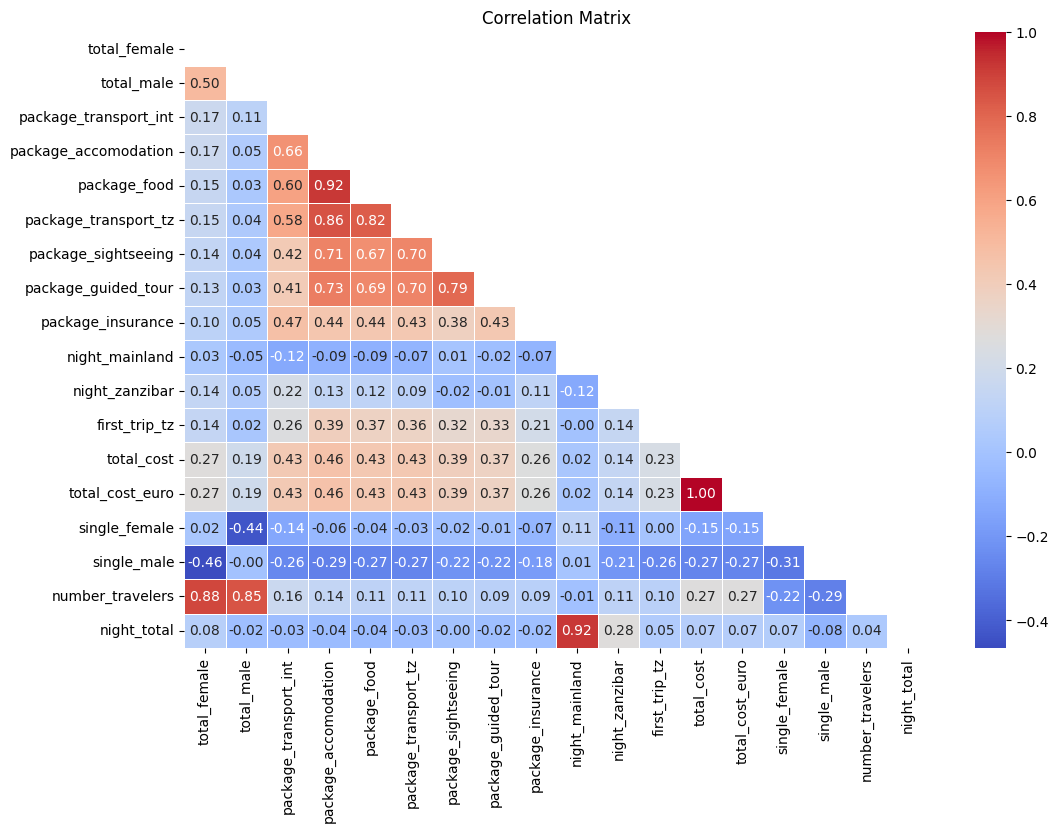

In [3]:
corr=df_train.corr(numeric_only=True)
mask=np.triu(corr)

plt.figure(figsize=(12, 8))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### Top Countries

#### Distribution

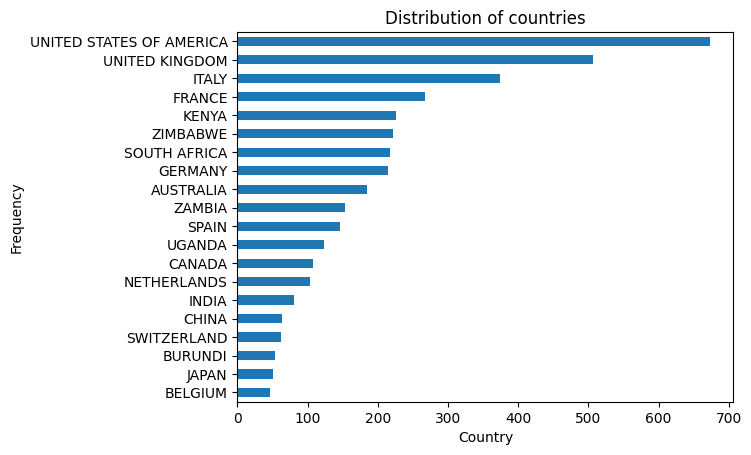

In [4]:
df_train['country'].value_counts().head(20).sort_values().plot(kind='barh')
plt.title("Distribution of countries")
plt.xlabel("Country")
plt.ylabel("Frequency");


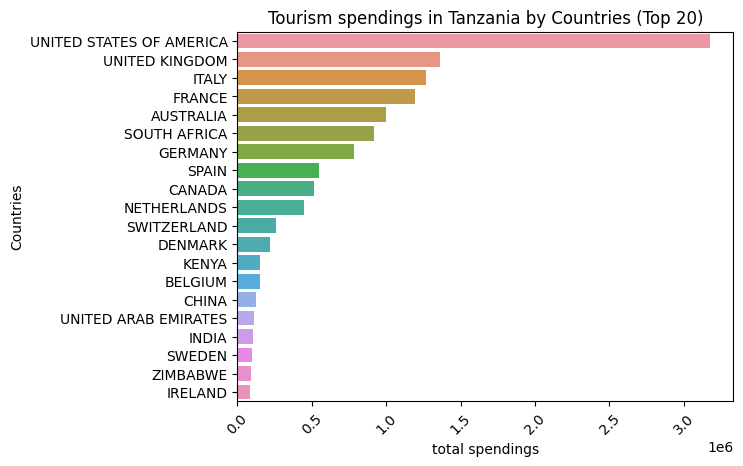

In [5]:
df_country = df_train.groupby(['country'])['total_cost_euro'].sum().rename("total_cost_by_country")
df_country= df_country.to_frame().reset_index()
df_country_sort= df_country.sort_values(['total_cost_by_country'],ascending=False).head(20)

sns.barplot(y='country', x='total_cost_by_country', data=df_country_sort)

plt.xticks(rotation=45)
plt.xlabel("total spendings")
plt.ylabel("Countries")
plt.title("Tourism spendings in Tanzania by Countries (Top 20)")
plt.show()


### Age Groups

#### Distribution

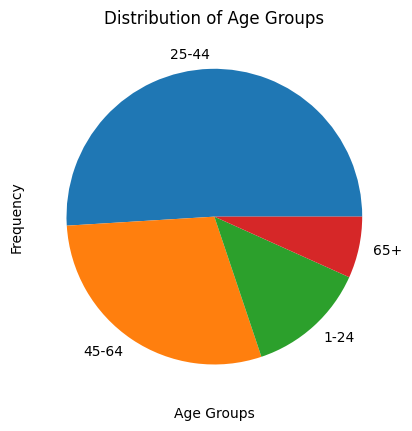

In [6]:
df_train['age_group'].value_counts().plot(kind='pie')
plt.title("Distribution of Age Groups")
plt.xlabel("Age Groups")
plt.ylabel("Frequency");

#### Spendings

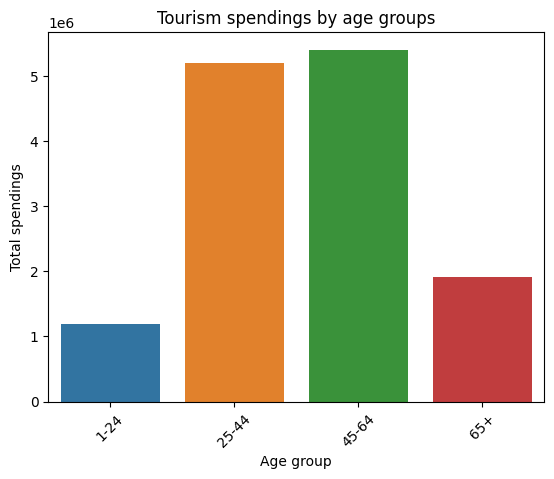

In [29]:
df_age= df_train.groupby(['age_group'])['total_cost_euro'].sum().rename("total_cost_by_age")
df_age= df_age.to_frame().reset_index()

sns.barplot(x='age_group', y='total_cost_by_age', data=df_age)

plt.xticks(rotation=45)
plt.ylabel("Total spendings")
plt.xlabel("Age group")
plt.title("Tourism spendings by age groups")
plt.show()

### People traveled with

#### Distribution

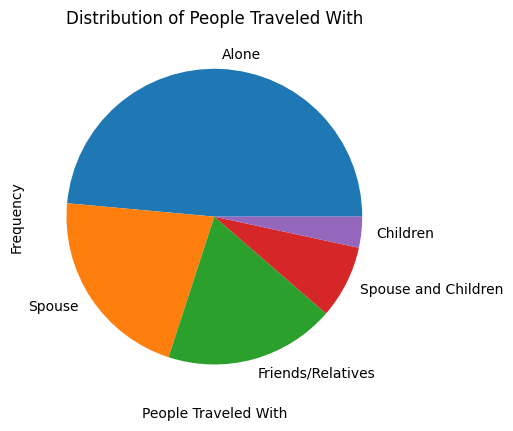

In [8]:
df_train['travel_with'].value_counts().plot(kind='pie') # bar, barh, 
plt.title("Distribution of People Traveled With")
plt.xlabel("People Traveled With")
plt.ylabel("Frequency");

#### Spendings

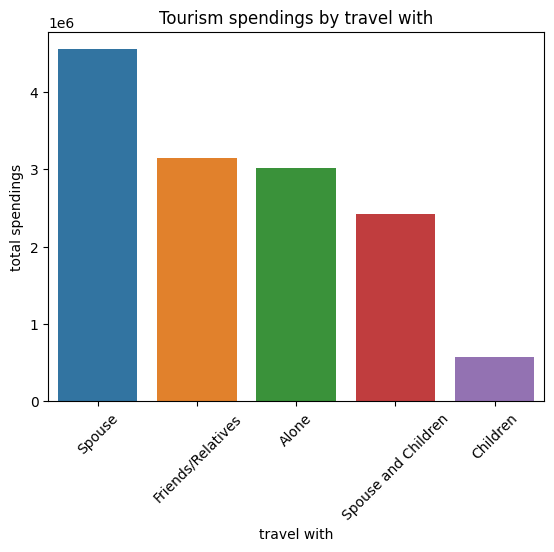

In [30]:
df_country = df_train.groupby(['travel_with'])['total_cost_euro'].sum().rename("travel_cost_by_travel_with").sort_values(ascending=False)
df_country= df_country.to_frame().reset_index()

sns.barplot(x='travel_with', y='travel_cost_by_travel_with', data=df_country)

plt.xticks(rotation=45)
plt.ylabel("total spendings")
plt.xlabel("travel with")
plt.title("Tourism spendings by travel with")
plt.show()

### Distribution of Information Sources

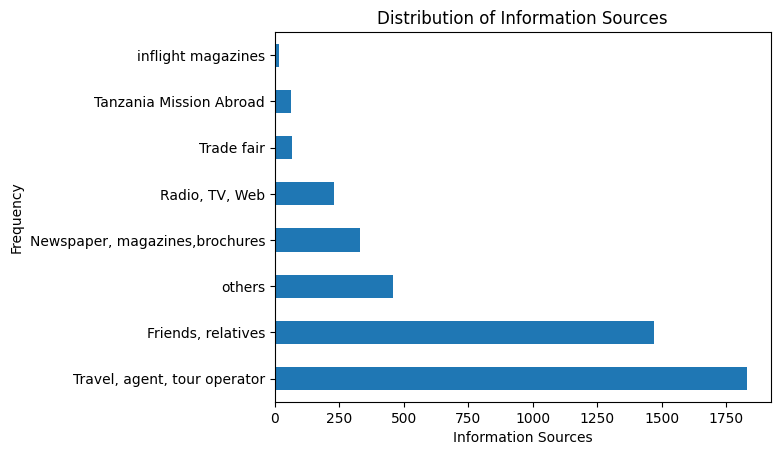

In [10]:
df_train['info_source'].value_counts().plot(kind='barh')
plt.title("Distribution of Information Sources")
plt.xlabel("Information Sources")
plt.ylabel("Frequency");

### Impressions

#### Distribution

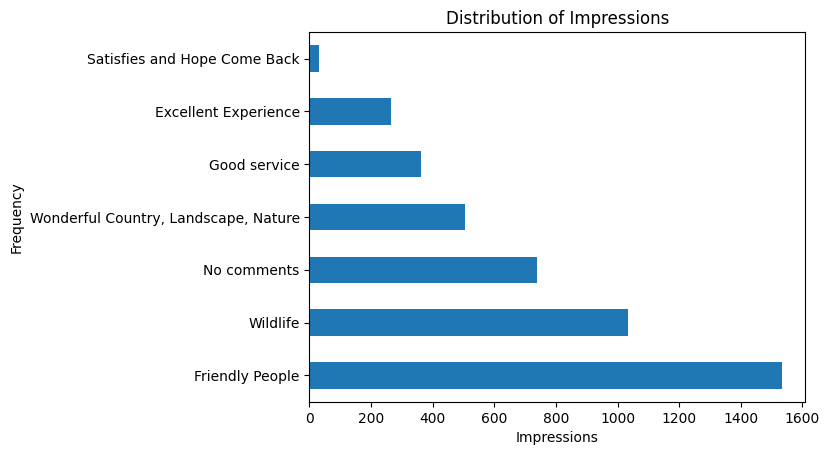

In [11]:
df_train['most_impressing'].value_counts().plot(kind='barh')
plt.title("Distribution of Impressions")
plt.xlabel("Impressions")
plt.ylabel("Frequency");

#### Spendings

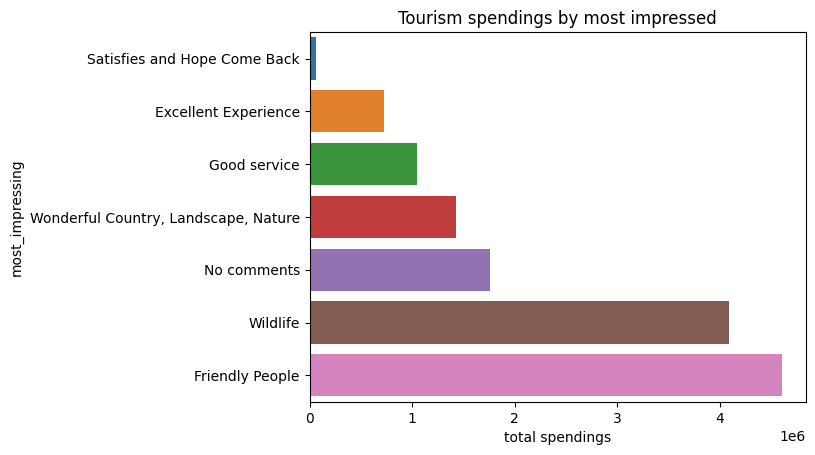

In [31]:
df_activity = df_train.groupby(['most_impressing'])['total_cost_euro'].sum().rename("travel_cost_by_most_impressing").sort_values()
df_activity= df_activity.to_frame().reset_index()

sns.barplot(y='most_impressing', x='travel_cost_by_most_impressing', data=df_activity)

plt.xlabel("total spendings")
plt.ylabel("most_impressing")
plt.title("Tourism spendings by most impressed")
plt.show()

### Main activities

#### Distribution

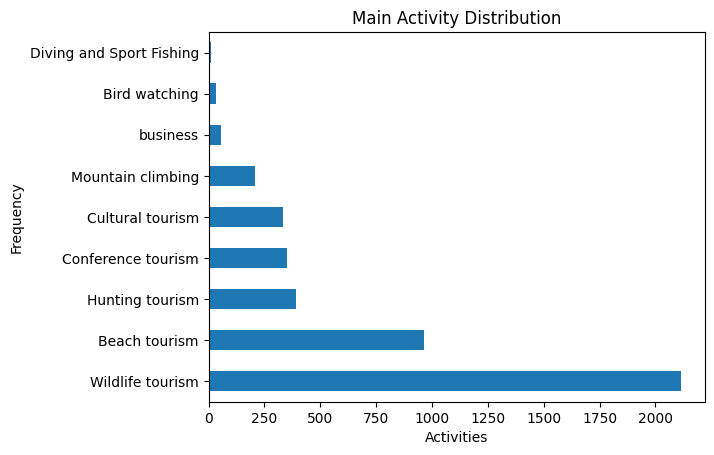

In [13]:
df_train['main_activity'].value_counts().plot(kind='barh')
plt.title("Main Activity Distribution")
plt.xlabel("Activities")
plt.ylabel("Frequency");

#### Spendings

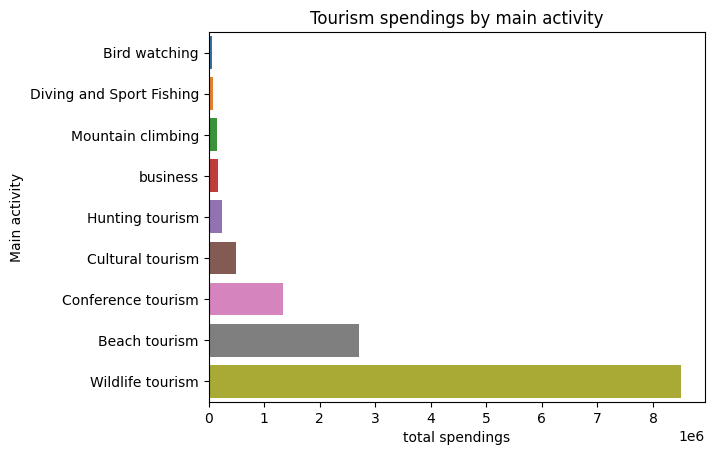

In [32]:
df_activity = df_train.groupby(['main_activity'])['total_cost_euro'].sum().rename("travel_cost_by_main_activity").sort_values()
df_activity= df_activity.to_frame().reset_index()

sns.barplot(y='main_activity', x='travel_cost_by_main_activity', data=df_activity)

plt.xlabel("total spendings")
plt.ylabel("Main activity")
plt.title("Tourism spendings by main activity")
plt.show()

### Purpose of travel

#### Distribution

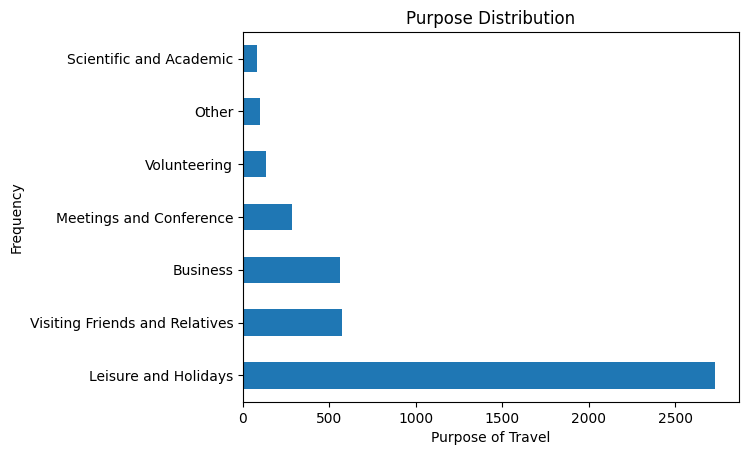

In [24]:
df_train['purpose'].value_counts().plot(kind='barh')
plt.title("Purpose Distribution")
plt.xlabel("Purpose of Travel")
plt.ylabel("Frequency");

#### Spendings

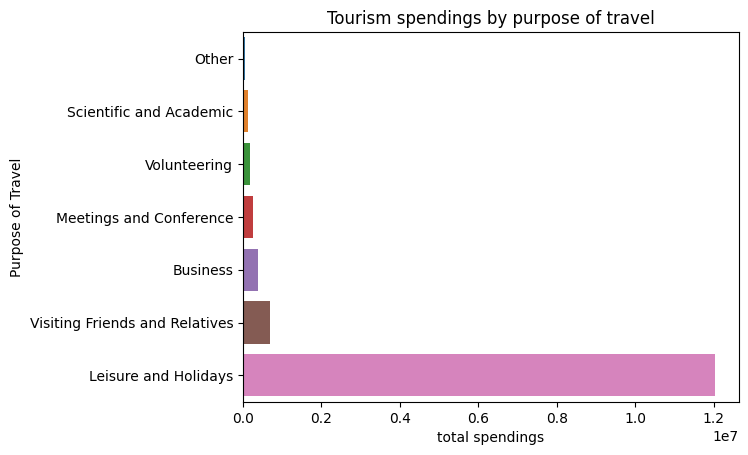

In [25]:
df_activity = df_train.groupby(['purpose'])['total_cost_euro'].sum().rename("travel_cost_by_purpose").sort_values()
df_activity= df_activity.to_frame().reset_index()

sns.barplot(y='purpose', x='travel_cost_by_purpose', data=df_activity)

plt.xlabel("total spendings")
plt.ylabel("Purpose of Travel")
plt.title("Tourism spendings by purpose of travel")
plt.show()

### Tour Arrangement 

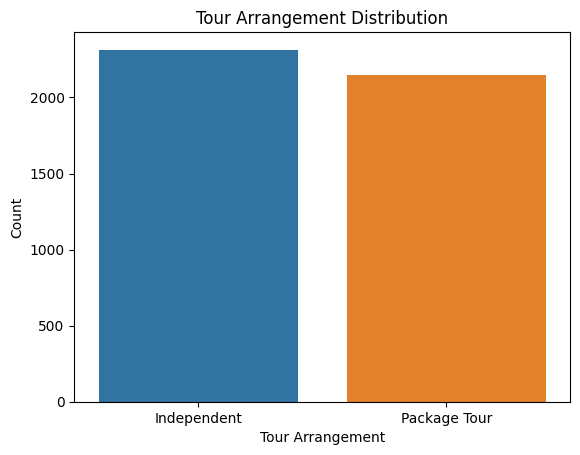

In [17]:
#fig,ax = plt.subplots(1,2,figsize=(16,16))

sns.countplot(x='tour_arrangement', data=df_train)
plt.title('Tour Arrangement Distribution')
plt.xlabel('Tour Arrangement')
plt.ylabel('Count')
plt.show()

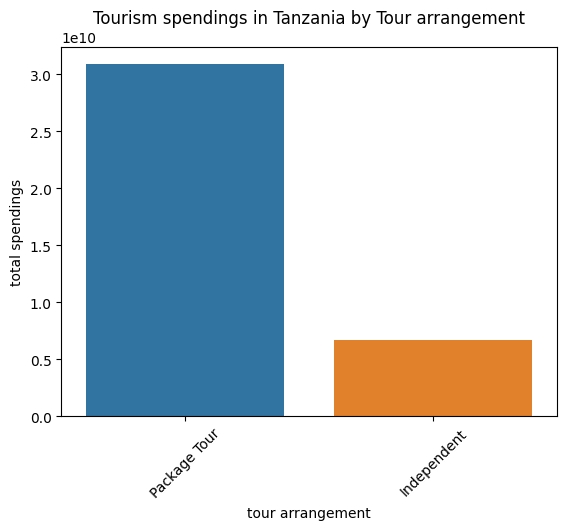

In [18]:
df_country_arrangment = df_train.groupby(['tour_arrangement'])['total_cost'].sum().rename("total_cost_by_country").sort_values(ascending=False)
df_country_arrangment= df_country_arrangment.to_frame().reset_index()

sns.barplot(x='tour_arrangement', y='total_cost_by_country', data=df_country_arrangment)

plt.xticks(rotation=45)
plt.ylabel("total spendings")
plt.xlabel("tour arrangement")
plt.title("Tourism spendings in Tanzania by Tour arrangement")
plt.show()

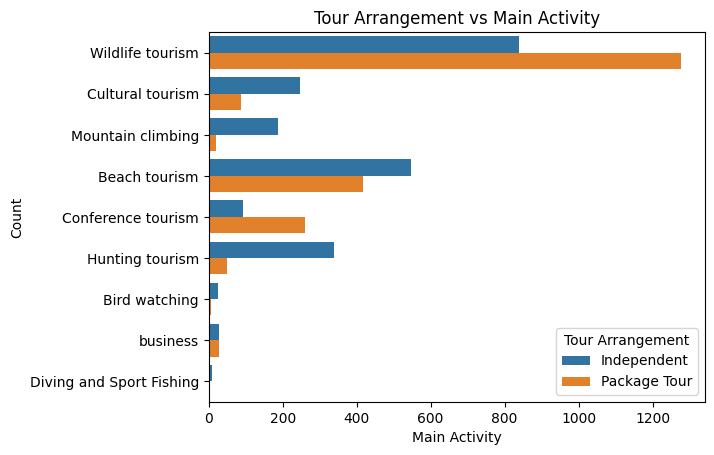

In [26]:
sns.countplot(y='main_activity', hue='tour_arrangement', data=df_train)
plt.title('Tour Arrangement vs Main Activity')
plt.xlabel('Main Activity')
plt.ylabel('Count')
plt.legend(title='Tour Arrangement')
plt.show()


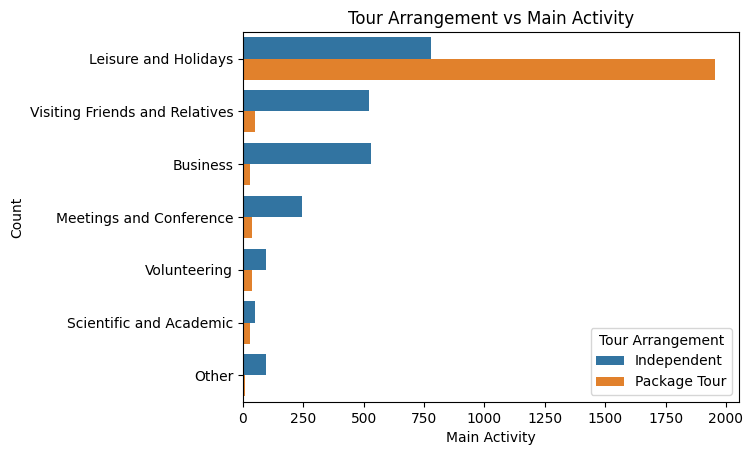

In [27]:

sns.countplot(y='purpose', hue='tour_arrangement', data=df_train)
plt.title('Tour Arrangement vs Main Activity')
plt.xlabel('Main Activity')
plt.ylabel('Count')
plt.legend(title='Tour Arrangement')
plt.show()

### Misc

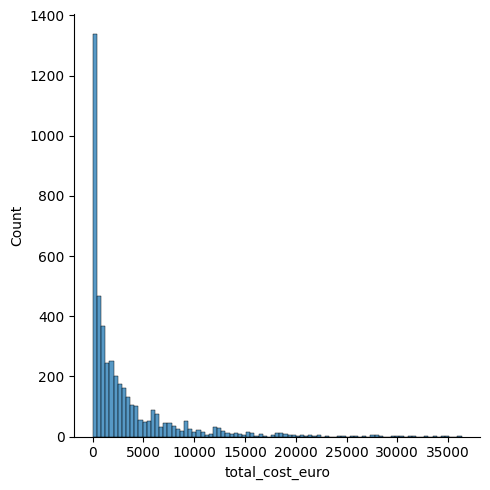

In [21]:
sns.displot(df_train, x="total_cost_euro")

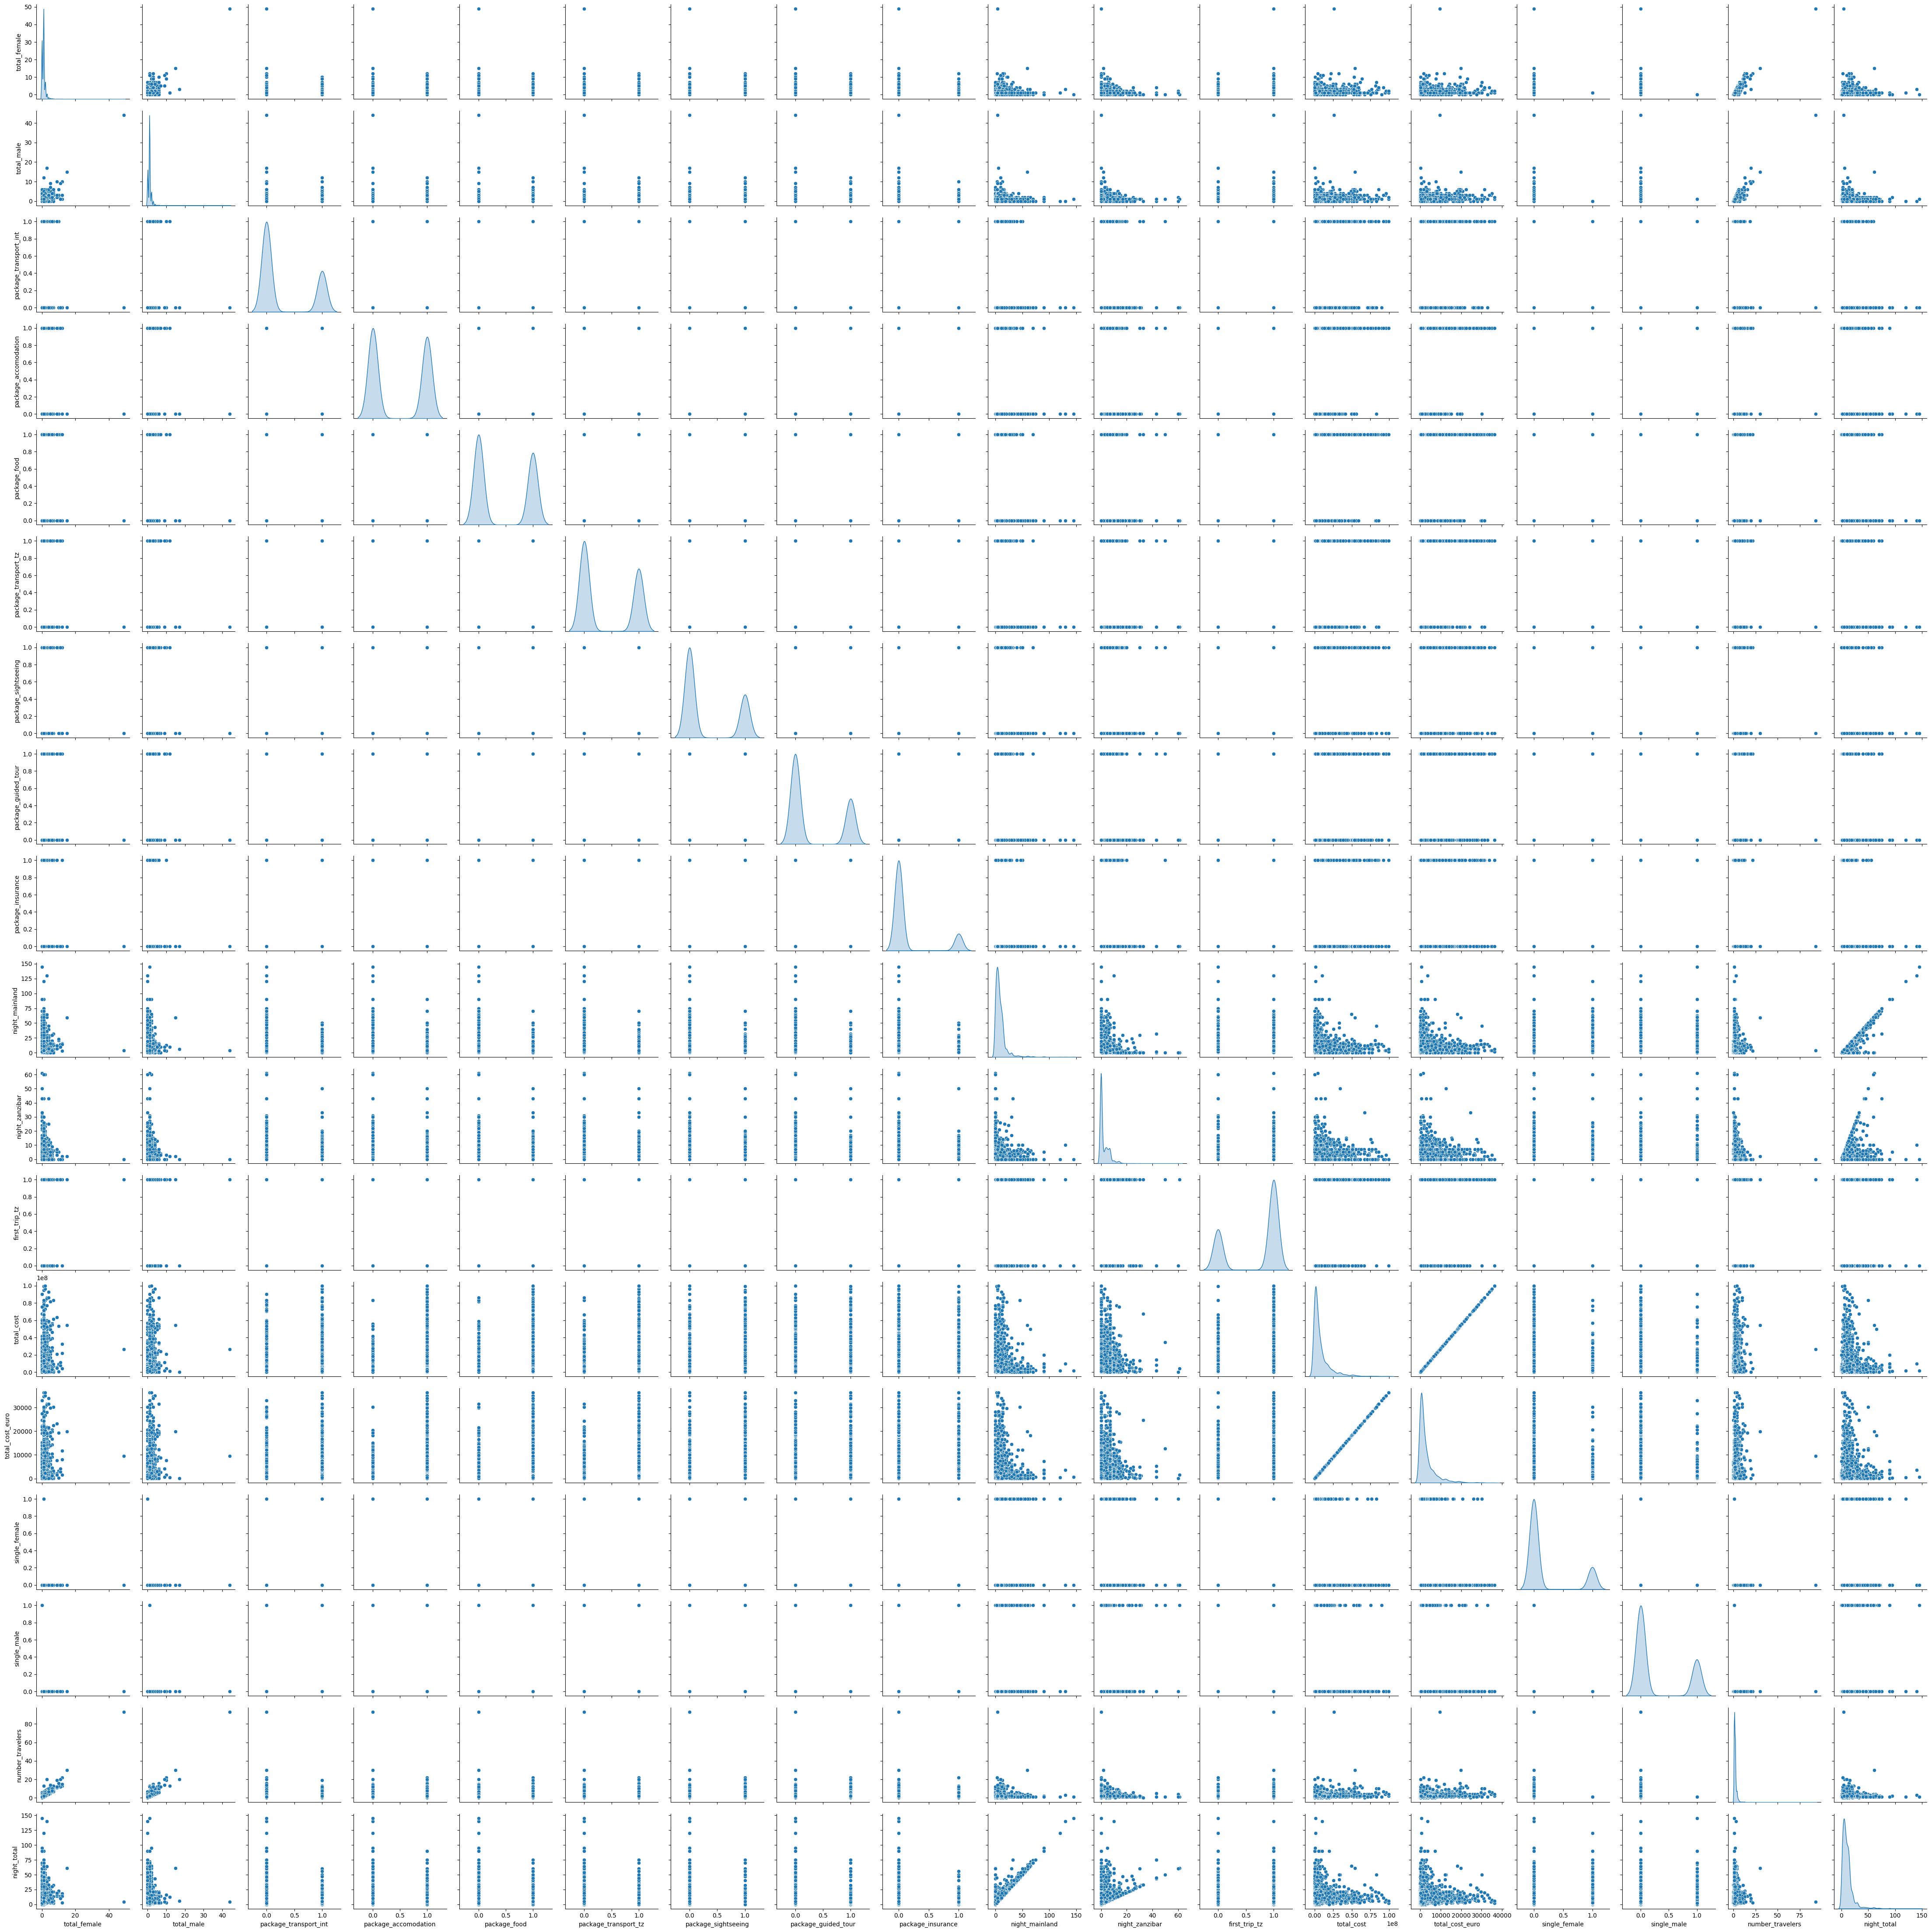

In [22]:
sns.pairplot(df_train, diag_kind='kde')
plt.show()